In [1]:
# MACD and stochastic oscillator with pandas for NVDA stock price

# MACD is a laggin indicator useful when trading crossovers. 
# MACD Calculation:
# MACD = 12-day-period Exponential Moving Average - 26-day-period-EMA
# Signal line: 9-Period EMA of MACD


# A Stochastic Oscillator is a laggin indicator
# Stochastic Oscillator Caclulation:
# 14-high: Maximum value of the last 14 trading days
# 14-low: Minimum of the last 14 days
# %K: (Last Close - 14 low)*100 /(14-high - 14-low)
# %D: Simple Moving Average of %K

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
data = pd.read_csv("NVDA.csv", index_col=0, parse_dates=True)

In [3]:
# Calculating the maximum stock price of the last 14 trading days
high14 = data['High'].rolling(14).max()
low14 = data['Low'].rolling(14).min()
data['%K'] = (data['Close']-low14)*100/(high14-low14)
data['%D'] = data['%K'].rolling(3).mean()

In [4]:
data.tail()
# %K and %D are percentages, so the values fall in the range between 0% and 100%

,Open,High,Low,Close,Adj Close,Volume,%K,%D
Date,,,,,,,,
2022-12-29,144.020004,146.830002,142.270004,146.029999,146.029999,35492300,14.655531,6.375618
2022-12-30,143.339996,146.289993,142.330002,146.139999,146.139999,31027300,14.879746,10.877845
2023-01-03,148.509995,149.960007,140.960007,143.149994,143.149994,40127700,8.785157,12.773478
2023-01-04,145.669998,148.529999,142.410004,147.490005,147.490005,43132400,19.803131,14.489345
2023-01-05,144.910004,145.639999,141.479996,142.649994,142.649994,38871200,11.088469,13.225586


<IPython.core.display.Javascript object>


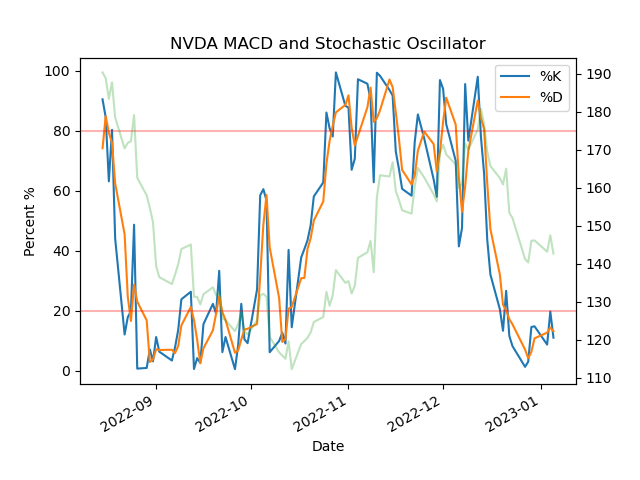

Text(0.5, 1.0, 'NVDA MACD and Stochastic Oscillator')

In [21]:
# Visualising %K and %D to interpret them, over the last 2 years:

fig, ax = plt.subplots()
data[['%K', '%D']].loc['2022-08-13':].plot(ax=ax)
ax.axhline(80, c='r', alpha=0.3)
ax.axhline(20, c='r', alpha=0.3)
data['Close'].loc['2022-08-13':].plot(ax=ax, alpha=0.3, secondary_y=True)

ax.set_ylabel('Percent %')
ax.set_title('NVDA MACD and Stochastic Oscillator')

# Interpreting the subplot:
# The green line is the closing stock price.
# When the orange and blue lines are above the top red line, it suggests the stock is overbought, and
# therefore it is time to sell.

# When the blue and orange line are below the red line, it suggests the stock is oversold, and  therefore
# it is time to buy.
